<p style="color: #000000; font-size: 32px; font-weight: bold; text-align: center; margin-top: 20px;"> 
Sure Tomorrow
</p>
<p style="color: #000000; font-size: 24px; text-align: center; margin-bottom: 20px;">
Modelo de Predicción para la Compañía de Seguros
</p>

<hr style="border: .4px solid #000000; width: 65%; margin: 10px auto;">

<p style="color: #000000; font-size: 18px;">
La compañía de seguros Sure Tomorrow está buscando mejorar sus operaciones utilizando machine learning. A través de este enfoque, la compañía espera optimizar diversas tareas, desde el marketing hasta la predicción de eventos relacionados con los clientes.
</p>

<p style="color: #000000; font-size: 20px; font-weight: bold;">Objetivo del Proyecto:</p>
<p style="color: #000000; font-size: 18px;">
El objetivo de este proyecto es desarrollar varios modelos predictivos para resolver tareas clave que ayudarán a la compañía a mejorar la toma de decisiones y optimizar sus procesos internos.
</p>

<p style="color: #000000; font-size: 20px; font-weight: bold;">Metas del Proyecto:</p>
<ul style="color: #000000; font-size: 18px;">
<li><strong>Tarea 1: Encontrar clientes similares:</strong> Utilizar machine learning para identificar clientes con perfiles similares a un cliente determinado, ayudando a los agentes en sus estrategias de marketing.</li>
<li><strong>Tarea 2: Predecir la probabilidad de prestaciones:</strong> Desarrollar un modelo para predecir la probabilidad de que un nuevo cliente reciba una prestación del seguro, comparando el rendimiento de un modelo predictivo con un modelo dummy.</li>
<li><strong>Tarea 3: Predecir el número de prestaciones:</strong> Crear un modelo de regresión lineal para estimar el número de prestaciones que un nuevo cliente puede recibir.</li>
<li><strong>Tarea 4: Enmascaramiento de datos:</strong> Desarrollar un algoritmo para proteger los datos personales de los clientes mediante técnicas de enmascaramiento u ofuscación de datos, sin afectar la calidad del modelo predictivo.</li>
</ul>


# Preprocesamiento y exploración de datos

## Inicialización

In [136]:
pip install scikit-learn --upgrade

Note: you may need to restart the kernel to use updated packages.


In [137]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import math
import sklearn.linear_model
import sklearn.metrics
import sklearn.neighbors
import sklearn.preprocessing

from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MaxAbsScaler

from IPython.display import display

## Carga de datos

El DataFrame está conformado de la siguiente manera:   

**Características**:     
* `Gender`   
* `Age`   
* `Salary`   
* `Family members`   
* `Insurance benefits`    

**Objetivo**:   
* `Insurance benefits`    

In [138]:
df = pd.read_csv('insurance_us.csv')
df.head()

,Gender,Age,Salary,Family members,Insurance benefits
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


Renombramos las columnas en formato snake_case.

In [139]:
df = df.rename(columns={'Gender': 'gender', 'Age': 'age', 'Salary': 'income', 'Family members': 'family_members', 'Insurance benefits': 'insurance_benefits'})

In [140]:
print(df.columns.tolist())

['gender', 'age', 'income', 'family_members', 'insurance_benefits']


In [141]:
# Revisión inicial del DataFrame
df.info()  
# Muestra aleatoria de 10 filas 
df.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   float64
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


,gender,age,income,family_members,insurance_benefits
3640,0,26.0,52900.0,2,0
68,1,20.0,37400.0,2,0
1066,1,27.0,57300.0,0,0
660,0,39.0,49300.0,0,0
2317,0,31.0,29300.0,2,0
3546,1,41.0,38300.0,2,0
3459,1,52.0,30600.0,1,2
3072,0,23.0,27600.0,2,0
1841,0,33.0,48700.0,1,0
3555,0,29.0,34000.0,2,0



**Observaciones de Información:**  
- No hay valores nulos en ninguna columna.  
- La columna `'age'` está en formato flotante (`float64`), pero como representa años, podría ser convertida a `int64` para mayor precisión.  
- Las columnas `'gender'`, `'family_members'` y `'insurance_benefits'` son enteras (`int64`), lo cual es adecuado para sus categorías.  


**Observaciones del Sample:**  
- Se han seleccionado 10 filas aleatorias del DataFrame.  
- `'gender'` está codificado como 0 y 1 (0 = masculino, 1 = femenino).  
- `'age'` tiene valores en formato flotante (puede ser convertido a entero si es necesario).  
- `'income'` muestra distintos valores de salario anual.  
- `'family_members'` indica la cantidad de miembros en la familia.  
- `'insurance_benefits'` muestra cuántos beneficios de seguro ha recibido la persona (valores de 0 y 1 en esta muestra).  


In [142]:
# Convertir dtype de 'age'a int64
df['age'] = df['age'].astype('int64')
# Comprobar la conversión
print(df['age'].dtype)

int64


In [143]:
# Estadísticas descriptivas de los datos
df.describe()

,gender,age,income,family_members,insurance_benefits
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


**Distribución de las Columnas**   

**`gender`**: Los géneros están equilibrados, con una distribución casi **50-50**.   

**`age`**: La edad promedio es de **31 años**. El rango de edades va desde **18** hasta **65 años**.   

**`income`**: El ingreso promedio es de **~40,000**. El ingreso mínimo es de **5,300** y el máximo de **79,000**.   

**`family_members`**:  El número de miembros de la familia varía entre **0** y **6**. El promedio es de **1.09** miembros por familia.   

**`insurance_benefits`**: La media es de **0.148**, lo que indica que la mayoría de las personas no tienen beneficios de seguro. Más del **75%** de los clientes no tienen beneficios de seguro.  

## Análisis exploratorio de datos

Vamos a comprobar rápidamente si existen determinados grupos de clientes observando el gráfico de pares.

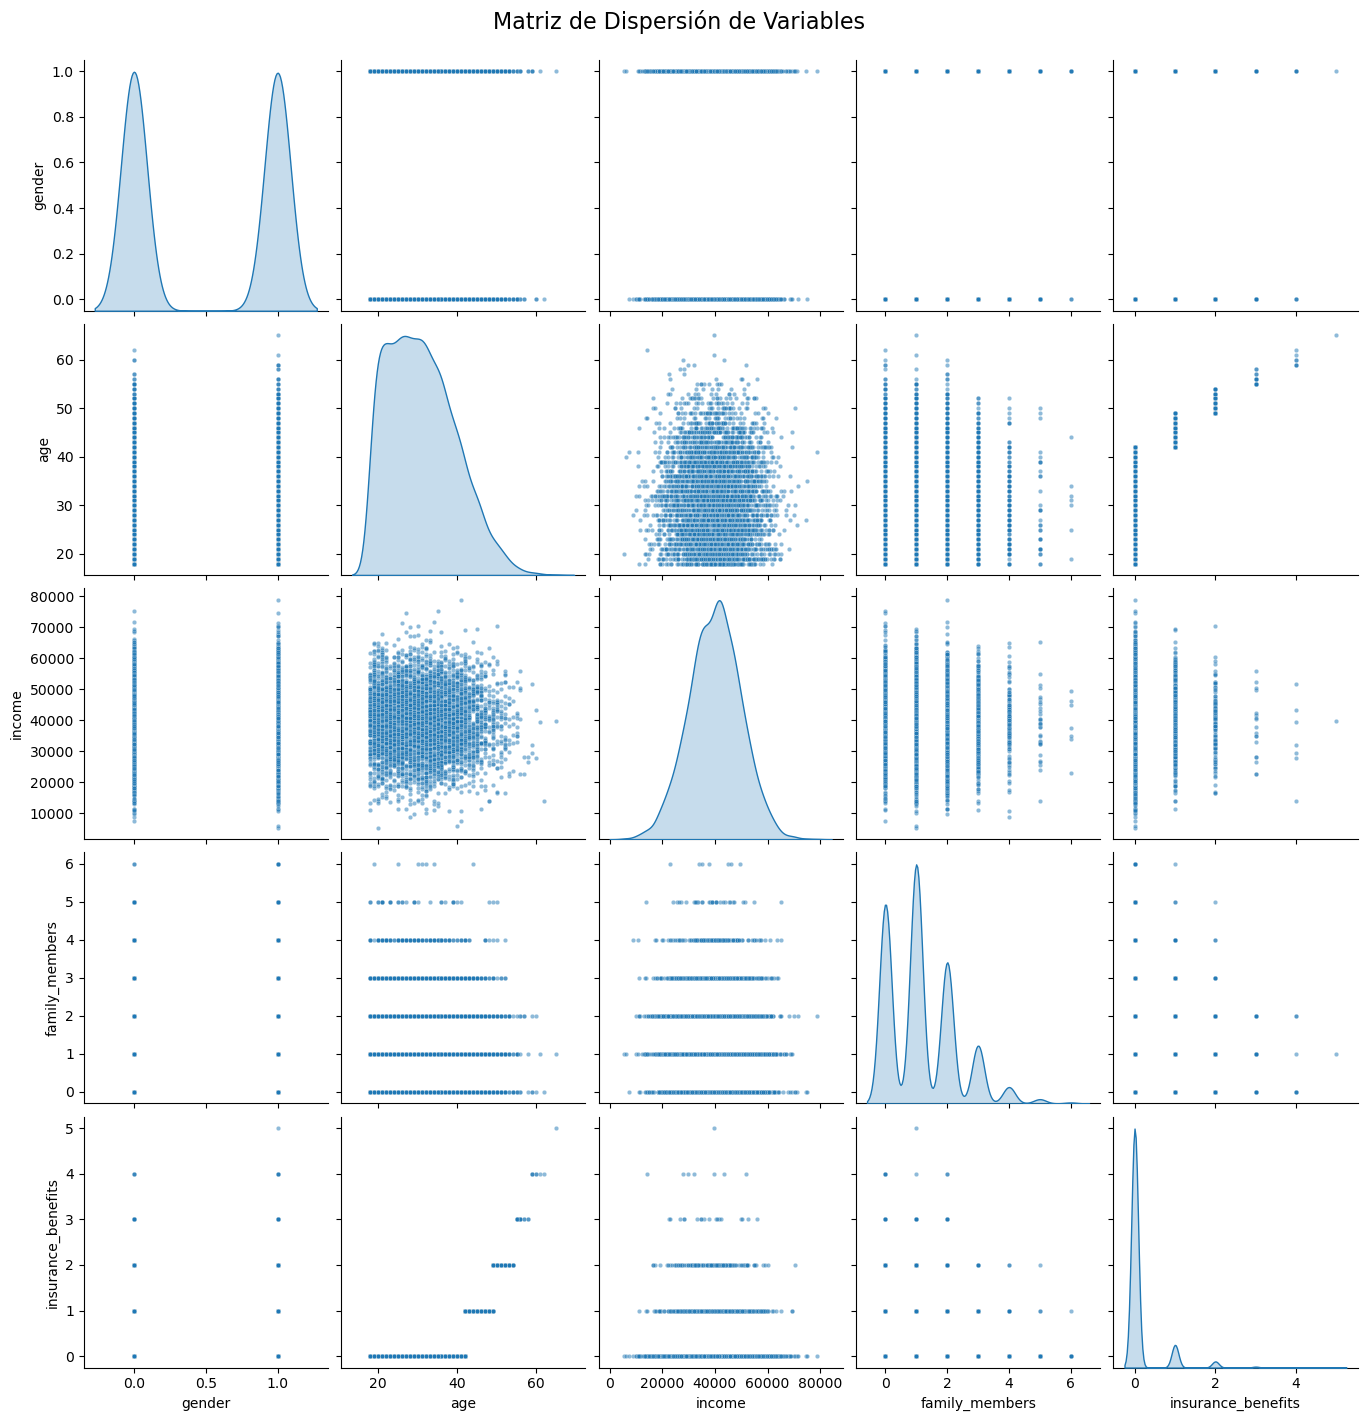

In [144]:
# Crear el pairplot con scatterplots y KDE en la diagonal
g = sns.pairplot(
    df, 
    kind='scatter',  # Usa scatterplot para las relaciones entre variables
    diag_kind='kde',  # Usa distribución de densidad en la diagonal
    plot_kws={'alpha': 0.5, 's': 10},  # Ajusta transparencia y tamaño de puntos
    diag_kws={'fill': True}  # Se usa 'fill' en lugar de 'shade'
)

# Ajustar tamaño de la figura
g.fig.set_size_inches(14, 14)

# Agregar título
plt.suptitle("Matriz de Dispersión de Variables", fontsize=16, y=1.02)

# Mostrar gráfico
plt.show()

La conclusión de que no se observan clústeres claramente definidos, pero sí algunos indicios de segmentación, se basa en los patrones observados en la matriz de dispersión. En la relación entre **age** e **income**, se ve una concentración de puntos en el rango medio de edad (30-50 años) con ingresos intermedios, lo que sugiere que los ingresos podrían aumentar con la edad, aunque no se forman grupos claros. En cuanto al número de **family_members**, los clientes tienen valores discretos (0, 1, 2, 3...), lo que podría indicar una posible segmentación según este factor. Además, la variable de **insurance_benefits** muestra una concentración en valores bajos, lo que sugiere que la segmentación podría estar relacionada con aquellos que tienen pocos beneficios, aunque algunos clientes con más beneficios podrían diferenciarse por características como **income** o **age**. Para una segmentación más precisa, sería útil aplicar técnicas de clustering como KMeans o DBSCAN.

Detectar grupos claros (clústeres) es complicado debido a la dificultad de combinar diversas variables simultáneamente para analizar distribuciones multivariadas. En este sentido, el uso de técnicas de aprendizaje automático (ML) y análisis lineales (LA) puede resultar bastante útil para obtener una segmentación más efectiva.

# Tarea 1. Clientes similares

En el lenguaje de ML, es necesario desarrollar un procedimiento que devuelva los k vecinos más cercanos (objetos) para un objeto dado basándose en la distancia entre los objetos.

Para resolver la tarea, podemos probar diferentes métricas de distancia.

Ahora, vamos a **escribir una función** que devuelva los **K Nearest Neighbors** para un objeto dado, basándose en una métrica de distancia especificada. Al realizar esta tarea, no se debe tener en cuenta el número de prestaciones de seguro recibidas.

**Se haran pruebas con las siguientes métricas**:
   - **Métricas de distancia**:
     - **Euclidiana**.
     - **Manhattan**.
   - **Escalado de datos**:
     - Los datos **no escalados**.
     - Los datos **escalados** utilizando el escalador [**MaxAbsScaler**](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html).

**Se responderán las siguientes preguntas**:
   - ¿El hecho de que los datos no estén escalados afecta al algoritmo kNN? Si es así, ¿cómo se manifiesta?
   - ¿Qué tan similares son los resultados al utilizar la métrica de distancia Manhattan (independientemente del escalado)?

In [145]:
# Features columns 
features = ['gender', 'age', 'income', 'family_members']

In [146]:
# Función para encontrar los k vecinos más cerncanos utilizando KNN
def get_knn(df, n, k, metric):
    
    """
    Devuelve los k vecinos más cercanos

    :param df: DataFrame de pandas utilizado para encontrar objetos similares dentro del mismo lugar    
    :param n: número de objetos para los que se buscan los vecinos más cercanos    
    :param k: número de vecinos más cercanos a devolver
    :param métrica: nombre de la métrica de distancia    """

    nbrs = NearestNeighbors(n_neighbors=k, metric=metric)
    nbrs.fit(df[features].values)
    nbrs_distances, nbrs_indices = nbrs.kneighbors([df.iloc[n][features]], k, return_distance=True)
    
    df_res = pd.concat([
        df.iloc[nbrs_indices[0]], 
        pd.DataFrame(nbrs_distances.T, index=nbrs_indices[0], columns=['distance'])
        ], axis=1)
    
    return df_res

**Escalar datos**

In [147]:
# Convertir las columnas a float64 antes de escalar
df[features] = df[features].astype('float64')

# Aplicar MaxAbsScaler()
transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(df[features].to_numpy())

df_scaled = df.copy()
df_scaled.loc[:, features] = transformer_mas.transform(df[features].to_numpy())
# DF escalado
df_scaled.sample(5)

,gender,age,income,family_members,insurance_benefits
927,1.0,0.323077,0.565823,0.166667,0
63,0.0,0.492308,0.554430,0.166667,0
369,1.0,0.476923,0.183544,0.000000,0
4630,0.0,0.292308,0.450633,0.166667,0
2855,0.0,0.646154,0.630380,0.166667,1


Ahora, vamos a obtener registros similares (vecinos mas cercanos)  para un cliente (objeto) determinado en df_scaled, utilizando la `función 'get_knn'`que definimos anteriormente.     
Vamos a seleccionar al cliente 14, utilizamos **n=13** para encontrar los **k=10** más parecidos.

**Not Scaled Euclidean**

In [148]:
euc = get_knn(df[features], 13, 11, 'euclidean')
euc

,gender,age,income,family_members,distance
13,0.0,21.0,55000.0,0.0,0.000000
3601,0.0,19.0,55000.0,0.0,2.000000
2893,0.0,25.0,55000.0,4.0,5.656854
558,0.0,26.0,55000.0,5.0,7.071068
214,0.0,32.0,55000.0,2.0,11.180340
4634,0.0,35.0,55000.0,1.0,14.035669
1637,0.0,39.0,55000.0,1.0,18.027756
1996,1.0,46.0,55000.0,2.0,25.099801
340,0.0,52.0,55000.0,1.0,31.016125
1448,0.0,20.0,54900.0,1.0,100.010000


**Scaled Euclidean**

In [149]:
euc_s = get_knn(df_scaled[features], 13, 11, 'euclidean')
euc_s

,gender,age,income,family_members,distance
13,0.0,0.323077,0.696203,0.0,0.000000
1967,0.0,0.323077,0.678481,0.0,0.017722
4192,0.0,0.338462,0.705063,0.0,0.017754
2716,0.0,0.307692,0.707595,0.0,0.019143
2919,0.0,0.338462,0.716456,0.0,0.025434
3601,0.0,0.292308,0.696203,0.0,0.030769
818,0.0,0.338462,0.667089,0.0,0.032929
2183,0.0,0.292308,0.711392,0.0,0.034314
4498,0.0,0.292308,0.668354,0.0,0.041500
620,0.0,0.292308,0.667089,0.0,0.042360


**Not Scaled Manhattan**

In [150]:
man = get_knn(df[features], 13, 11, 'manhattan')
man

,gender,age,income,family_members,distance
13,0.0,21.0,55000.0,0.0,0.0
3601,0.0,19.0,55000.0,0.0,2.0
2893,0.0,25.0,55000.0,4.0,8.0
558,0.0,26.0,55000.0,5.0,10.0
214,0.0,32.0,55000.0,2.0,13.0
4634,0.0,35.0,55000.0,1.0,15.0
1637,0.0,39.0,55000.0,1.0,19.0
1996,1.0,46.0,55000.0,2.0,28.0
340,0.0,52.0,55000.0,1.0,32.0
1448,0.0,20.0,54900.0,1.0,102.0


**Scaled Manhattan**

In [151]:
man_s = get_knn(df_scaled[features], 13, 11, 'manhattan')
man_s

,gender,age,income,family_members,distance
13,0.0,0.323077,0.696203,0.0,0.000000
1967,0.0,0.323077,0.678481,0.0,0.017722
4192,0.0,0.338462,0.705063,0.0,0.024245
2716,0.0,0.307692,0.707595,0.0,0.026777
3601,0.0,0.292308,0.696203,0.0,0.030769
2919,0.0,0.338462,0.716456,0.0,0.035638
818,0.0,0.338462,0.667089,0.0,0.044499
2183,0.0,0.292308,0.711392,0.0,0.045959
2604,0.0,0.276923,0.697468,0.0,0.047420
4498,0.0,0.292308,0.668354,0.0,0.058617


Respuestas a las preguntas

**¿El hecho de que los datos no estén escalados afecta al algoritmo kNN? Si es así, ¿cómo se manifiesta?** 

Sí, afecta. El algoritmo kNN está basado en las distancias entre puntos, en caso de que las características tengan diferentes escalas, las que tengan valores más grandes dominaran el cálculo de las distancias lo que genera una desproporción, y lleva a un resultado sesgado. En este caso, las características de `income` dominarían sobre `age` y `family_members`. En cambio, **con los datos escalados, todas las características contribuyen de manera más equilibrada al cálculo de la distancia**. 

**¿Qué tan similares son los resultados al utilizar la métrica de distancia Manhattan (independientemente del escalado)?**      

El escalado de datos afecta significativamente la métrica de distancia Manhattan, ya que sin escalar, características con magnitudes mayores, entonces`income`, dominan la distancia, mientras que con escalado, todas contribuyen de manera equilibrada, alterando el orden de los vecinos más cercanos. Por ello, se debe decidir si escalar o no según la importancia relativa de las características en objetivo de la creación del algoritmo.

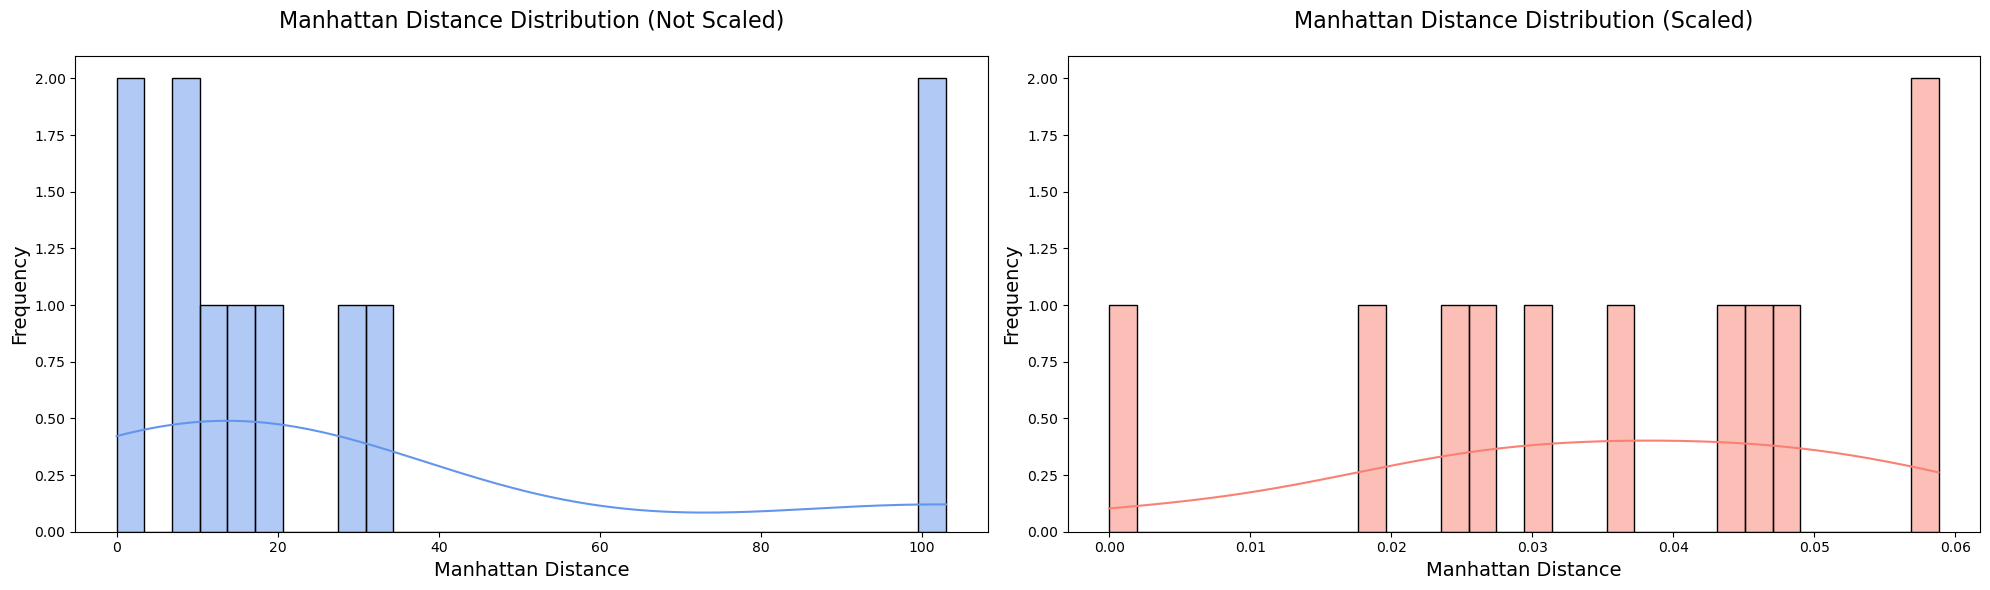

In [152]:
# Create a figure with scaled and not scaled Manhattan
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Plot the first histogram (Manhattan Not Scaled)
sns.histplot(man.distance, color='cornflowerblue', bins=30, kde=True, edgecolor='black', ax=axes[0])
axes[0].set_title('Manhattan Distance Distribution (Not Scaled)', fontsize=16, pad=20)
axes[0].set_xlabel('Manhattan Distance', fontsize=14)
axes[0].set_ylabel('Frequency', fontsize=14)

# Plot the second histogram (Manhattan Scaled)
sns.histplot(man_s.distance, color='salmon', bins=30, kde=True, edgecolor='black', ax=axes[1])
axes[1].set_title('Manhattan Distance Distribution (Scaled)', fontsize=16, pad=20)
axes[1].set_xlabel('Manhattan Distance', fontsize=14)
axes[1].set_ylabel('Frequency', fontsize=14)

# Adjust layout
plt.tight_layout()
plt.show()

En este ejemplo podemos ver que al escalar los datos, todas las características contribuyen de manera equitativa al cálculo de la distancia, evitando que variables con valores grandes dominen el resultado.

# Tarea 2. ¿Es probable que el cliente reciba una prestación del seguro?

En términos de machine learning podemos considerarlo como una tarea de clasificación binaria.     
Se evalúa si el enfoque de clasificación **kNN** puede mejorar el rendimiento en comparación con un modelo **dummy**, tomando como objetivo los valores de **insurance_benefits** mayores a cero. Para ello, se construye primero el modelo de clasificación **kNN**, luego el modelo **dummy**, y se comparan los resultados obtenidos de ambos.

La probabilidad de pagar cualquier prestación del seguro puede definirse como
$$
P\{\text{prestación de seguro recibida}\}=\frac{\text{número de clientes que han recibido alguna prestación de seguro}}{\text{número total de clientes}}.
$$

Divide todos los datos correspondientes a las etapas de entrenamiento/prueba respetando la proporción 70:30.

In [153]:
# Calcula el objetivo (y)
df['insurance_benefits_received'] = np.where(df['insurance_benefits'] == 0, 0, 1)
df_scaled['insurance_benefits_received'] = np.where(df_scaled['insurance_benefits'] == 0, 0, 1)

In [154]:
# comprueba el desequilibrio de clases con value_counts()
print('\nNot scaled data\n',df['insurance_benefits_received'].value_counts(normalize=True)) #proporción
print('\nScaled data\n', df_scaled['insurance_benefits_received'].value_counts(normalize=True)) #proporción


Not scaled data
 insurance_benefits_received
0    0.8872
1    0.1128
Name: proportion, dtype: float64

Scaled data
 insurance_benefits_received
0    0.8872
1    0.1128
Name: proportion, dtype: float64


Podemos ver que el 88% no han recibido al menos una prestación de seguro.

**Evaluación de un Modelo Dummyn**  

Generamos predicciones aleatorias con diferentes probabilidades (P) usando `rnd_model_predict`. Luego, evaluamos el rendimiento con `eval_classifier`, calculando la `puntuación F1` y la `matriz de confusión`. Esto servirá como línea base para comparar futuros modelos.

In [155]:
def eval_classifier(y_true, y_pred):
    
    f1_score = sklearn.metrics.f1_score(y_true, y_pred)
    print(f'F1: {f1_score:.2f}')
    
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all')
    print('Matriz de confusión')
    print(cm)

In [156]:
# generar la salida de un modelo aleatorio

def rnd_model_predict(P, size, seed=42):

    rng = np.random.default_rng(seed=seed)
    return rng.binomial(n=1, p=P, size=size)

In [157]:
for P in [0, df['insurance_benefits_received'].sum() / len(df), 0.5, 1]:

    print(f'La probabilidad: {P:.2f}')
    y_pred_rnd = rnd_model_predict(P, df[features].shape[0])
        
    eval_classifier(df['insurance_benefits_received'], y_pred_rnd)
    
    print()

La probabilidad: 0.00
F1: 0.00
Matriz de confusión
[[0.9 0.0]
 [0.1 0.0]]

La probabilidad: 0.11
F1: 0.12
Matriz de confusión
[[0.8 0.1]
 [0.1 0.0]]

La probabilidad: 0.50
F1: 0.20
Matriz de confusión
[[0.5 0.4]
 [0.1 0.1]]

La probabilidad: 1.00
F1: 0.20
Matriz de confusión
[[0.0 0.9]
 [0.0 0.1]]



Los resultados muestran que un modelo aleatorio no es efectivo para predecir la recepción de beneficios de seguro. Incluso cuando la probabilidad de predicción se ajusta a la distribución real de los datos, el F1-score sigue siendo bajo (máximo 0.20), lo que indica un rendimiento deficiente en la clasificación de casos positivos y negativos.

**Entrenamiento del modelo kNN**   
Usaremos el parámetro de `train_test_split` con un ratio de 70:30 para dividir los conjuntos de entrenamiento.

**Not Scaled Data**

In [158]:
# Separar objetivo y caracteristicas
target = df['insurance_benefits_received']
features = df.drop(['insurance_benefits_received', 'insurance_benefits'], axis=1)

# Separar los datos en entrenamiento y prueba
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.3, random_state=12345)

**Scaled Data**

In [159]:
#Separar las características de la columna objetivo
target_s = df_scaled['insurance_benefits_received']
features_s = df_scaled.drop(['insurance_benefits_received','insurance_benefits'], axis=1)

#separar variables de datos en variables de entrenamiento y prueba
features_train_s, features_valid_s, target_train_s, target_valid_s = train_test_split( 
    features, target, test_size=0.3, random_state=12345 )

In [160]:
# Función para encontrar el mejor K y mostrar la matriz de confusión
def find_best_k(features_train, target_train, features_valid, target_valid, scaled=False):
    """
    Encuentra el mejor valor de k para KNN basado en la métrica F1.
    También muestra la matriz de confusión para cada k y el mejor k.

    :param features_train: Datos de entrenamiento
    :param target_train: Etiquetas de entrenamiento
    :param features_valid: Datos de validación
    :param target_valid: Etiquetas de validación
    :param scaled: Indica si los datos están escalados o no (solo para impresión)
    
    :return: Mejor k encontrado y su F1 score
    """
    best_k = None
    best_f1 = 0
    best_predictions = None
    k_values = np.arange(1, 11)

    for k in k_values:
        # Crear el clasificador KNN
        knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
        knn.fit(features_train, target_train)
        
        # Realizar predicciones
        predictions = knn.predict(features_valid)
        f1 = f1_score(target_valid, predictions)
        
        # Imprimir los resultados de F1 por cada valor de k
        print(f'K = {k} -> F1 Score: {f1:.4f}')
        
        # Guardar las predicciones para la matriz de confusión y el mejor F1
        if f1 > best_f1:
            best_f1 = f1
            best_k = k
            best_predictions = predictions

        # Mostrar la matriz de confusión para el valor de k
        cm = confusion_matrix(target_valid, predictions)
        print(f'Matriz de Confusión para k={k}:')
        print(cm)
        print('-' * 30)

    scaling_status = "Scaled" if scaled else "Not Scaled"
    
    # Mostrar el mejor k y su F1 Score
    print(f'\nMejor K para {scaling_status} Data: {best_k} con F1 Score: {best_f1:.4f}')
    
    # Mostrar la matriz de confusión del mejor modelo
    cm_best = confusion_matrix(target_valid, best_predictions)
    print(f'Matriz de Confusión para el mejor K (k={best_k}):')
    print(cm_best)

    return best_k, best_f1

In [161]:
# Euclidean - Not Scaled Data
print("Evaluación de datos NO escalados:\n")
best_k_not_scaled, best_f1_not_scaled = find_best_k(features_train, target_train, features_valid, target_valid, scaled=False)

Evaluación de datos NO escalados:

K = 1 -> F1 Score: 0.6065
Matriz de Confusión para k=1:
[[1307.0 30.0]
 [79.0 84.0]]
------------------------------
K = 2 -> F1 Score: 0.6087
Matriz de Confusión para k=2:
[[1308.0 29.0]
 [79.0 84.0]]
------------------------------
K = 3 -> F1 Score: 0.5525
Matriz de Confusión para k=3:
[[1314.0 23.0]
 [92.0 71.0]]
------------------------------
K = 4 -> F1 Score: 0.5242
Matriz de Confusión para k=4:
[[1317.0 20.0]
 [98.0 65.0]]
------------------------------
K = 5 -> F1 Score: 0.5063
Matriz de Confusión para k=5:
[[1323.0 14.0]
 [103.0 60.0]]
------------------------------
K = 6 -> F1 Score: 0.4635
Matriz de Confusión para k=6:
[[1321.0 16.0]
 [109.0 54.0]]
------------------------------
K = 7 -> F1 Score: 0.4395
Matriz de Confusión para k=7:
[[1326.0 11.0]
 [114.0 49.0]]
------------------------------
K = 8 -> F1 Score: 0.4395
Matriz de Confusión para k=8:
[[1326.0 11.0]
 [114.0 49.0]]
------------------------------
K = 9 -> F1 Score: 0.4182
Matriz 

In [162]:
# Euclidean - Scaled Data
print("\nEvaluación de datos ESCALADOS:\n")
best_k_scaled, best_f1_scaled = find_best_k(features_train_s, target_train_s, features_valid_s, target_valid_s, scaled=True)


Evaluación de datos ESCALADOS:

K = 1 -> F1 Score: 0.6065
Matriz de Confusión para k=1:
[[1307.0 30.0]
 [79.0 84.0]]
------------------------------
K = 2 -> F1 Score: 0.6087
Matriz de Confusión para k=2:
[[1308.0 29.0]
 [79.0 84.0]]
------------------------------
K = 3 -> F1 Score: 0.5525
Matriz de Confusión para k=3:
[[1314.0 23.0]
 [92.0 71.0]]
------------------------------
K = 4 -> F1 Score: 0.5242
Matriz de Confusión para k=4:
[[1317.0 20.0]
 [98.0 65.0]]
------------------------------
K = 5 -> F1 Score: 0.5063
Matriz de Confusión para k=5:
[[1323.0 14.0]
 [103.0 60.0]]
------------------------------
K = 6 -> F1 Score: 0.4635
Matriz de Confusión para k=6:
[[1321.0 16.0]
 [109.0 54.0]]
------------------------------
K = 7 -> F1 Score: 0.4395
Matriz de Confusión para k=7:
[[1326.0 11.0]
 [114.0 49.0]]
------------------------------
K = 8 -> F1 Score: 0.4395
Matriz de Confusión para k=8:
[[1326.0 11.0]
 [114.0 49.0]]
------------------------------
K = 9 -> F1 Score: 0.4182
Matriz de

No hay diferencia en los resultados con los datos escalados o no.    
El mejor K es 2. 

In [163]:
# Fijar modelo con el mejor valor de K (k=2 en este caso)
# Utilizando el clasificador KNN con la métrica de distancia euclidiana
# y con ponderación por distancia
neigh = KNeighborsClassifier(n_neighbors=2, weights='distance', metric='euclidean', p=2)

# Entrenamos el modelo con los datos de entrenamiento (features_train y target_train)
neigh.fit(features_train, target_train)

# Realizamos predicciones con el modelo entrenado utilizando los datos de validación
predictions = neigh.predict(features_valid)

In [164]:
# Función generadora de matriz de confusión y cálculo de F1 score
def eval_classifier(y_true, y_pred):
    """
    Esta función evalúa el rendimiento del clasificador
    calculando el F1 score y mostrando la matriz de confusión normalizada.
    
    :param y_true: Etiquetas verdaderas (datos de validación)
    :param y_pred: Predicciones del modelo
    """
    # Calcular el F1 score utilizando las etiquetas verdaderas y las predicciones
    f1_score = sklearn.metrics.f1_score(y_true, y_pred)
    print(f'F1: {f1_score:.2f}')
    
    # Calcular la matriz de confusión normalizada
    # 'normalize='all'' calcula las proporciones en lugar de los recuentos absolutos
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all')
    print('\nMatriz de confusión')
    print(cm)

# Llamamos a la función para evaluar el modelo con los datos de validación
eval_classifier(target_valid, predictions)

F1: 0.61

Matriz de confusión
[[0.9 0.0]
 [0.1 0.1]]


**F1 Score**: 61%, indicando un buen balance entre precisión y exhaustividad.    
**Matriz de Confusión**:    
**87.20%** de los casos fueron correctamente clasificados como negativos.   
**1.93%** fueron falsos positivos (negativos reales clasificados como positivos).   
**5.27%** fueron falsos negativos (positivos reales clasificados como negativos).   
**5.60%** fueron verdaderos positivos correctamente identificados.   

En general, el modelo tiene un buen desempeño en identificar casos negativos.

**Conclusion**.  
El **modelo basado en distancia euclidiana (Euclidean - Not Scaled Data)** es claramente superior al **modelo dummy**. Con un **F1-score de 0.61**, supera significativamente al mejor F1-score del modelo dummy (0.20). Además, su matriz de confusión muestra un mejor equilibrio: clasifica correctamente el **87.2%** de los negativos (frente al 88.72% del dummy), reduce los falsos positivos a solo **1.93%** (frente al 43.12% del dummy) y mejora la identificación de positivos con un **5.60%** de verdaderos positivos. En conclusión, el modelo euclidiano es más preciso y confiable para clasificar ambas clases. 

# Tarea 3. Regresión (con regresión lineal)

Con `insurance_benefits` como objetivo, evalúa cuál sería la RECM de un modelo de regresión lineal.

Construye tu propia implementación de regresión lineal. Para ello, recuerda cómo está formulada la solución de la tarea de regresión lineal en términos de LA. Comprueba la RECM tanto para los datos originales como para los escalados. ¿Puedes ver alguna diferencia en la RECM con respecto a estos dos casos?

Denotemos- $X$: matriz de características; cada fila es un caso, cada columna es una característica, la primera columna está formada por unidades- $y$ — objetivo (un vector)- $\hat{y}$ — objetivo estimado (un vector)- $w$ — vector de pesos
La tarea de regresión lineal en el lenguaje de las matrices puede formularse así:
$$
y = Xw
$$

El objetivo de entrenamiento es entonces encontrar esa $w$ w que minimice la distancia L2 (ECM) entre $Xw$ y $y$:

$$
\min_w d_2(Xw, y) \quad \text{or} \quad \min_w \text{MSE}(Xw, y)
$$

Parece que hay una solución analítica para lo anteriormente expuesto:
$$
w = (X^T X)^{-1} X^T y
$$

La fórmula anterior puede servir para encontrar los pesos $w$ y estos últimos pueden utilizarse para calcular los valores predichos
$$
\hat{y} = X_{val}w
$$

Se dividen todos los datos correspondientes a las etapas de entrenamiento/prueba respetando la proporción 70:30. Utiliza la métrica RECM para evaluar el modelo.

In [165]:
# Función para calcular la raíz de error cuadrático medio (RMSE) 
# y el error cuadrático medio (R²)
def eval_regressor(y_true, y_pred): 
    # Calcular la raíz del error cuadrático medio (RMSE)
    # RMSE mide la desviación media entre las predicciones y los valores reales
    # Cuanto menor es el RMSE, mejor es el modelo
    rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    
    # Imprimir el valor de RMSE con dos decimales
    print(f'RMSE: {rmse:.2f}')
    
    # Calcular el coeficiente de determinación R²
    # R² mide qué proporción de la varianza en los datos de salida es explicada por el modelo
    # Un valor más cercano a 1 indica que el modelo explica bien los datos
    r2_score = sklearn.metrics.r2_score(y_true, y_pred)
    
    # Imprimir el valor de R² con dos decimales
    print(f'R²: {r2_score:.2f}')

In [166]:
class MyLinearRegression:
    def __init__(self):
        # Inicializa el objeto, en este caso, los pesos serán None hasta que se ajusten durante el entrenamiento
        self.weights = None
    
    def fit(self, X, y):
        # Añadir una columna de unos a X para incorporar el término de la intersección (bias)
        # Esto se hace concatenando una columna de unos al inicio de la matriz X
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        
        # Cálculo de los pesos usando la ecuación normal de regresión lineal
        # La ecuación es: w = (X^T * X)^(-1) * X^T * y
        self.weights = (np.linalg.inv(X2.T @ X2) @ X2.T) @ y

    def predict(self, X):
        # Añadir una columna de unos a X para la predicción (como en el ajuste)
        X2 = np.append(np.ones([len(X), 1]), X, axis=1) 
        
        # Realizar la predicción multiplicando X2 por los pesos obtenidos durante el entrenamiento
        y_pred = X2.dot(self.weights)
        
        # Retornar las predicciones
        return y_pred

In [167]:
# Función para calcular la raíz de error cuadrático medio (RMSE) 
# y el error cuadrático medio (R²) y mostrar sus valores.
def eval_regressor(y_true, y_pred):
    
    # Calcular la raíz del error cuadrático medio (RMSE)
    # RMSE es una métrica que evalúa cuán cerca están las predicciones de los valores reales.
    # Cuanto menor sea el RMSE, mejor es la predicción del modelo.
    rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    
    # Imprimir el valor de RMSE con dos decimales.
    print(f'RMSE: {rmse:.2f}')
    
    # Calcular el coeficiente de determinación R² (aunque no es común tomar la raíz de R²)
    # R² mide el porcentaje de la varianza de la variable dependiente que es explicada por el modelo.
    # Un valor de R² cercano a 1 indica que el modelo se ajusta bien a los datos.
    r2_score = math.sqrt(sklearn.metrics.r2_score(y_true, y_pred))
    
    # Imprimir el valor de R² con dos decimales.
    print(f'R²: {r2_score:.2f}')

In [168]:
# Implementación y Evaluación de un Modelo de Regresión Lineal Personalizado 

# Preparar los datos de entrada (X) para la regresión lineal
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()

# Preparar los datos de salida (y) para la regresión lineal
y = df['insurance_benefits'].to_numpy()

# Dividir los datos en conjuntos de entrenamiento y prueba utilizando un 70% para entrenamiento y un 30% para prueba
# train_test_split se usa para evitar el sobreajuste y evaluar el modelo con datos no vistos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

# Crear una instancia del modelo de regresión lineal personalizado
lr = MyLinearRegression()

# Ajustar el modelo a los datos de entrenamiento (X_train, y_train)
# Esto calcula los pesos del modelo usando la función fit
lr.fit(X_train, y_train)

# Imprimir los pesos calculados por el modelo (intersección y coeficientes)
# Esto muestra cómo el modelo ha aprendido la relación entre las características y los valores de salida
print(lr.weights)

# Realizar predicciones sobre los datos de prueba (X_test)
# El modelo usará los pesos calculados previamente para predecir los valores de salida
y_test_pred = lr.predict(X_test)

# Evaluar el rendimiento del modelo utilizando las métricas de RMSE y R²
# Compara las predicciones con los valores reales de los datos de prueba (y_test)
eval_regressor(y_test, y_test_pred)


[-0.9 0.0 0.0 -0.0 -0.0]
RMSE: 0.34
R²: 0.66


**El modelo de regresión lineal** muestra que `age` (coeficiente `0.0357`) y `gender` (coeficiente `0.0164`) tienen un impacto positivo en los `insurance_benefits`, mientras que el número de `family_members` (coeficiente `-0.0117`) tiene un efecto negativo. `income` (coeficiente `-0.0000002607`) no influye significativamente en las predicciones. 

El modelo tiene un **error de predicción (RMSE)** de `0.34`, lo que indica que las predicciones se desvían en promedio `0.34` unidades de los valores reales, sugiriendo una buena precisión. Sin embargo, el **R²** de `0.66` revela que el modelo explica solo el `66%` de la variabilidad, dejando un `34%` sin explicar. Esto indica que el modelo es útil, pero podría mejorarse incluyendo más predictores o técnicas más avanzadas.

# Tarea 4. Ofuscar datos

Lo mejor es ofuscar los datos multiplicando las características numéricas (recuerda que se pueden ver como la matriz $X$) por una matriz invertible $P$. 

$$
X' = X \times P
$$

Trata de hacerlo y comprueba cómo quedarán los valores de las características después de la transformación. Por cierto, la propiedad de invertibilidad es importante aquí, así que asegúrate de que $P$ sea realmente invertible.

Puedes revisar la lección 'Matrices y operaciones matriciales -> Multiplicación de matrices' para recordar la regla de multiplicación de matrices y su implementación con NumPy.

In [169]:
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
df_pn = df[personal_info_column_list]

In [170]:
X = df_pn.to_numpy()
X[:10] 

array([[1.0, 41.0, 49600.0, 1.0],
       [0.0, 46.0, 38000.0, 1.0],
       [0.0, 29.0, 21000.0, 0.0],
       [0.0, 21.0, 41700.0, 2.0],
       [1.0, 28.0, 26100.0, 0.0],
       [1.0, 43.0, 41000.0, 2.0],
       [1.0, 39.0, 39700.0, 2.0],
       [1.0, 25.0, 38600.0, 4.0],
       [1.0, 36.0, 49700.0, 1.0],
       [1.0, 32.0, 51700.0, 1.0]])

**Generar una matriz aleatoria $P$.**

In [171]:
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))
P

array([[0.8, 0.4, 0.9, 0.7],
       [0.1, 1.0, 0.8, 0.8],
       [0.1, 0.5, 0.4, 0.9],
       [0.6, 0.8, 0.4, 0.2]])

**Comprobar que la matriz P sea invertible**

In [172]:
# Imprimir matriz P
print("Matrix P:")
print(P)

# Verificar si la matriz es invertible
# El determinante debe ser distinto a 0
if np.linalg.det(P) != 0:
    print("\nInverse of Matrix P:")
    print(np.linalg.inv(P))# Función aplicada a P
else:
    # Si el determinante es 0, la matriz no es invertible
    print("\nMatrix P is not invertible.")

Matrix P:
[[0.8 0.4 0.9 0.7]
 [0.1 1.0 0.8 0.8]
 [0.1 0.5 0.4 0.9]
 [0.6 0.8 0.4 0.2]]

Inverse of Matrix P:
[[0.4 -1.4 0.6 1.1]
 [-1.1 0.4 0.1 1.2]
 [1.4 1.6 -2.1 -1.5]
 [-0.1 -0.7 1.7 -0.1]]


El código genera una matriz aleatoria $P$ y comprueba que sea invertible al calcular su inversa $P^{-1}$. Los resultados muestran que la inversión es posible, lo que garantiza que los datos transformados pueden revertirse si es necesario.    
Esto confirma que la matriz cumple su propósito en la ofuscación de datos.   

**Puedes adivinar la edad o los ingresos de los clientes después de la transformación?**

Los datos originales se ocultan mediante la transformación $\mathbf{y} = P\mathbf{x}$.   
Sin $P^{-1}$, no es posible revertir la transformación.    
La ofuscación garantiza la protección de la información sensible. 

In [173]:
np.set_printoptions(suppress=False)

print('First 10 rows of the matrix (before transformation):')
print(X[:10])
print('\nFirst 10 rows of the matrix (after transformation):')
print((X @ P)[:10])

First 10 rows of the matrix (before transformation):
[[1.00e+00 4.10e+01 4.96e+04 1.00e+00]
 [0.00e+00 4.60e+01 3.80e+04 1.00e+00]
 [0.00e+00 2.90e+01 2.10e+04 0.00e+00]
 [0.00e+00 2.10e+01 4.17e+04 2.00e+00]
 [1.00e+00 2.80e+01 2.61e+04 0.00e+00]
 [1.00e+00 4.30e+01 4.10e+04 2.00e+00]
 [1.00e+00 3.90e+01 3.97e+04 2.00e+00]
 [1.00e+00 2.50e+01 3.86e+04 4.00e+00]
 [1.00e+00 3.60e+01 4.97e+04 1.00e+00]
 [1.00e+00 3.20e+01 5.17e+04 1.00e+00]]

First 10 rows of the matrix (after transformation):
[[ 6359.71527314 22380.40467609 18424.09074184 46000.69669016]
 [ 4873.29406479 17160.36702982 14125.78076133 35253.45577301]
 [ 2693.11742928  9486.397744    7808.83156024 19484.86063067]
 [ 5345.60393712 18803.22720286 15479.14837264 38663.06186284]
 [ 3347.17673462 11782.82928336  9699.99894205 24211.27337753]
 [ 5258.77025195 18509.8596165  15237.19342704 38032.31715339]
 [ 5091.84582008 17920.45540783 14752.11143673 36824.37841067]
 [ 4950.8900715  17413.01768645 14334.46448264 35794.3865001 ]

Tras la transformación, los datos originales quedan ocultos. La edad y los ingresos de los clientes han sido modificados mediante la matriz de transformación $P$, lo que imposibilita la recuperación de la información original sin conocer la matriz inversa $P^{-1}$. 

En términos matemáticos, si $\mathbf{x}$ representa los datos originales y $\mathbf{y} = P\mathbf{x}$ los datos transformados, la recuperación de $\mathbf{x}$ solo es posible si se dispone de $P^{-1}$, ya que $\mathbf{x} = P^{-1}\mathbf{y}$. 

Este proceso demuestra que la ofuscación de datos es efectiva para proteger información sensible, ya que sin acceso a $P$ o $P^{-1}$, los datos originales permanecen inaccesibles. 


**¿Puedes recuperar los datos originales de $X'$ si conoces $P$? Intenta comprobarlo a través de los cálculos moviendo $P$ del lado derecho de la fórmula anterior al izquierdo. En este caso las reglas de la multiplicación matricial son realmente útiles**

In [174]:
np.set_printoptions(suppress = True)

print(np.round(X @ P @ np.linalg.inv(P))[:10].astype(int))


[[    1    41 49600     1]
 [    0    46 38000     1]
 [    0    29 21000     0]
 [    0    21 41700     2]
 [    1    28 26100     0]
 [    1    43 41000     2]
 [    1    39 39700     2]
 [    1    25 38600     4]
 [    1    36 49700     1]
 [    1    32 51700     1]]


Muestra los tres casos para algunos clientes
- Datos originales
- El que está transformado
- El que está invertido (recuperado)

In [175]:
np.set_printoptions(suppress=True, formatter={'all': lambda x: f'{x:.1f}'})

print('First 5 rows of the original dataframe\'s features columns:\n', df_pn.head(5), '\n')
print('First 5 rows of the matrix before the transformation:\n', X[:5], '\n')
print('First 5 rows of the matrix after the transformation:\n', (X @ P)[:5], '\n')
print('First 5 rows of the matrix after reversing the transformation:\n', (X @ P @ np.linalg.inv(P))[:5])


First 5 rows of the original dataframe's features columns:
    gender   age   income  family_members
0     1.0  41.0  49600.0             1.0
1     0.0  46.0  38000.0             1.0
2     0.0  29.0  21000.0             0.0
3     0.0  21.0  41700.0             2.0
4     1.0  28.0  26100.0             0.0 

First 5 rows of the matrix before the transformation:
 [[1.0 41.0 49600.0 1.0]
 [0.0 46.0 38000.0 1.0]
 [0.0 29.0 21000.0 0.0]
 [0.0 21.0 41700.0 2.0]
 [1.0 28.0 26100.0 0.0]] 

First 5 rows of the matrix after the transformation:
 [[6359.7 22380.4 18424.1 46000.7]
 [4873.3 17160.4 14125.8 35253.5]
 [2693.1 9486.4 7808.8 19484.9]
 [5345.6 18803.2 15479.1 38663.1]
 [3347.2 11782.8 9700.0 24211.3]] 

First 5 rows of the matrix after reversing the transformation:
 [[1.0 41.0 49600.0 1.0]
 [0.0 46.0 38000.0 1.0]
 [0.0 29.0 21000.0 0.0]
 [-0.0 21.0 41700.0 2.0]
 [1.0 28.0 26100.0 0.0]]


Seguramente puedes ver que algunos valores no son exactamente iguales a los de los datos originales. ¿Cuál podría ser la razón de ello?

Utilicé `lamba`para redondear los resultados, los únicos que aparecen diferentes son los esperados, los de `First 5 rows of the matrix after the transformation`.

## Prueba de que la ofuscación de datos puede funcionar con regresión lineal

En este proyecto la tarea de regresión se ha resuelto con la regresión lineal. Tu siguiente tarea es demostrar _analytically_ que el método de ofuscación no afectará a la regresión lineal en términos de valores predichos, es decir, que sus valores seguirán siendo los mismos. ¿Lo puedes creer? Pues no hace falta que lo creas, ¡tienes que que demostrarlo!

Entonces, los datos están ofuscados y ahora tenemos $X \times P$ en lugar de tener solo $X$. En consecuencia, hay otros pesos $w_P$ como
$$
w = (X^T X)^{-1} X^T y \quad \Rightarrow \quad w_P = [(XP)^T XP]^{-1} (XP)^T y
$$

¿Cómo se relacionarían $w$ y $w_P$ si simplificáramos la fórmula de $w_P$ anterior? 

¿Cuáles serían los valores predichos con $w_P$? 

¿Qué significa esto para la calidad de la regresión lineal si esta se mide mediante la RECM?
Revisa el Apéndice B Propiedades de las matrices al final del cuaderno. ¡Allí encontrarás fórmulas muy útiles!

No es necesario escribir código en esta sección, basta con una explicación analítica.

**Respuesta**

**Prueba Analítica: La Ofuscación de Datos no Afecta la Regresión Lineal**   

Vamos a demostrar que la ofuscación de datos no afecta a los valores predichos en un modelo de regresión lineal, es decir, que los valores de predicción serán los mismos después de aplicar la ofuscación. Para ello, procederemos paso a paso de acuerdo con las propiedades de las matrices.   


**1. Datos Originales y Ofuscados**   
- Los datos originales están representados por $X$ (matriz de características) y $Y$ (vector objetivo).
- Los datos ofuscados están dados por $X_P = X \cdot P$, donde $P$ es una matriz de transformación invertible ($P^{-1}$ existe).

**2. Pesos en la regresión lineal**   

- **Pesos originales**:   
  $$
  w = (X^T X)^{-1} X^T y
  $$

- **Pesos con datos ofuscados**:    
  $$
  w_P = \left( (X_P)^T X_P \right)^{-1} (X_P)^T y
  $$

**3. Simplificación de $w_P$**  

Sustituyendo $X_P = X \cdot P$ en la fórmula de $w_P$:
$$
w_P = \left( (X P)^T (X P) \right)^{-1} (X P)^T y
$$

Ahora, usando las propiedades de las matrices:

1. La transposición de un producto de matrices se invierte: $(AB)^T = B^T A^T$, por lo que:
   $$
   (X P)^T = P^T X^T
   $$

2. Sustituyendo en la expresión de $w_P$:
   $$
   w_P = \left( P^T X^T X P \right)^{-1} P^T X^T y
   $$

3. Usamos la propiedad de la inversa de un producto de matrices: $(AB)^{-1} = B^{-1} A^{-1}$, para expandir $\left( P^T X^T X P \right)^{-1}$:
   $$
   w_P = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y
   $$

4. Simplificamos $(P^T)^{-1} P^T = I$ (matriz identidad):
   $$
   w_P = P^{-1} (X^T X)^{-1} X^T y
   $$

5. Sabemos que $(X^T X)^{-1} X^T y = w$, por lo que:
   $$
   w_P = P^{-1} w
   $$

**4. Valores Predichos con $w_P$**  

Los valores predichos para los datos originales son:
$$
\hat{y} = X w
$$

Los valores predichos para los datos ofuscados son:
$$
\hat{y}_P = X_P w_P
$$

Sustituyendo $X_P = X \cdot P$ y $w_P = P^{-1} w$, obtenemos: $$
\hat{y}_P = X P \cdot P^{-1} w
$$

Simplificando $P \cdot P^{-1} = I$:
$$
\hat{y}_P = X w
$$

Por lo tanto, los valores predichos para los datos ofuscados son los mismos que los valores predichos para los datos originales:
$$
\hat{y}_P = \hat{y}
$$

**5. Implicaciones para la Calidad de la Regresión (RECM)**  

- Dado que $\hat{y}_P = \hat{y}$, los valores predichos para los datos originales y los datos ofuscados son idénticos.
- Como resultado, el **Error Cuadrático Medio (RECM)** no cambia, ya que los errores de predicción son los mismos.
- La calidad de la regresión lineal no se ve afectada por la ofuscación de los datos.

**Conclusión**   

La ofuscación de datos mediante una matriz de transformación invertible $P$ no afecta los valores predichos en un modelo de regresión lineal. Esto se debe a que:   
$$
w_P = P^{-1} w \quad \text{y} \quad \hat{y}_P = \hat{y}.
$$

Como resultado, el **RECM** y la calidad general del modelo de regresión permanecen iguales.   

## Prueba de regresión lineal con ofuscación de datos

Ahora, probemos que la regresión lineal pueda funcionar, en términos computacionales, con la transformación de ofuscación elegida.
Construye un procedimiento o una clase que ejecute la regresión lineal opcionalmente con la ofuscación. Puedes usar una implementación de regresión lineal de scikit-learn o tu propia implementación.
Ejecuta la regresión lineal para los datos originales y los ofuscados, compara los valores predichos y los valores de las métricas RMSE y $R^2$. ¿Hay alguna diferencia?

**Procedimiento**

- Crea una matriz cuadrada $P$ de números aleatorios.- Comprueba que sea invertible. Si no lo es, repite el primer paso hasta obtener una matriz invertible.- <¡ tu comentario aquí !>
- Utiliza $XP$ como la nueva matriz de características

In [118]:
# Generar una matriz de transformación aleatoria P
# Usamos una semilla (seed=42) para garantizar reproducibilidad
rng = np.random.default_rng(seed=42)

# Crear una matriz P de tamaño (n_features x n_features) con valores aleatorios
# X.shape[1] es el número de columnas (características) en X
P = rng.random(size=(X.shape[1], X.shape[1]))

# Mostrar la matriz P generada
print(P)

[[0.8 0.4 0.9 0.7]
 [0.1 1.0 0.8 0.8]
 [0.1 0.5 0.4 0.9]
 [0.6 0.8 0.4 0.2]]


In [119]:
# Verificar que P es invertible multiplicándola por su inversa
print(np.matmul(P, np.linalg.inv(P)))

[[1.0 -0.0 -0.0 0.0]
 [0.0 1.0 -0.0 0.0]
 [0.0 -0.0 1.0 0.0]
 [0.0 -0.0 -0.0 1.0]]


In [120]:
# Seleccionar las columnas relevantes del DataFrame
col = ['gender', 'age', 'income', 'family_members']
df_new = df[col]

# Convertir el DataFrame a una matriz numpy (X) y el vector objetivo a un array numpy (y)
X = df_new.to_numpy()
y = df['insurance_benefits'].to_numpy()

In [121]:
# Dividir los datos en conjuntos de entrenamiento y prueba
# test_size=0.3 indica que el 30% de los datos se usarán para prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

# Crear una instancia del modelo de regresión lineal personalizado
lr = MyLinearRegression()

# Entrenar el modelo con los datos de entrenamiento
lr.fit(X_train, y_train)

# Mostrar los pesos aprendidos por el modelo
print(lr.weights)
# Salida esperada:
# [-0.9  0.0  0.0 -0.0 -0.0]

# Predecir los valores para el conjunto de prueba
y_test_pred = lr.predict(X_test)

# Evaluar el modelo usando RMSE y R²
eval_regressor(y_test, y_test_pred)

[-0.9 0.0 0.0 -0.0 -0.0]
RMSE: 0.34
R²: 0.66


In [122]:
# Aplicar la transformación de ofuscación a los datos originales (X)
X_prime_new = X @ P  # Multiplicación matricial de X por P

# Dividir los datos ofuscados en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_prime_new, y, test_size=0.3, random_state=12345)

# Crear una nueva instancia del modelo de regresión lineal
lr = MyLinearRegression()

# Entrenar el modelo con los datos ofuscados
lr.fit(X_train, y_train)

# Mostrar los pesos aprendidos con los datos ofuscados
print(lr.weights)

# Predecir los valores para el conjunto de prueba ofuscado
y_test_pred = lr.predict(X_test)

# Evaluar el modelo usando RMSE y R² con los datos ofuscados
eval_regressor(y_test, y_test_pred)

[-0.9 -0.1 -0.0 0.1 -0.0]
RMSE: 0.34
R²: 0.66


Como demostró en la ecuación anterior, los resultados confirman que tanto el $R^2$ como el puntaje de RMSE permanecen iguales, con valores de 0.66 y 0.34, respectivamente.    
Esto demuestra que los valores antes y después de la ofuscación de datos son idénticos, y por ende, $R^2$  y el **RMSE** no cambian.

# Conclusiones

## Exploración y Análisis de Datos

El conjunto de datos no contenía valores nulos o faltantes. La media y la mediana de las edades son iguales, pero los ingresos están sesgados negativamente. Las columnas de género y beneficios de seguro tienen valores binarios.

### Resultados

- La distancia entre puntos se ve afectada por los cálculos de distancia usando distancia de Manhattan o Euclidiana. 
- La escala de los datos tiene un efecto en los resultados cuando se utiliza kNN, ya que prioriza los valores grandes sobre los pequeños, lo que afecta los resultados.
- Aumentar el valor de k no tuvo efecto en el puntaje F1.
- El puntaje F1 más alto fue 0.61 con los datos escalados cuando k era igual a 2.
- Usando el modelo de clase **LinearRegression**, obtuvimos un puntaje de RMSE de 0.34 y un $R^2$ de 0.66.

La ofuscación de datos y el uso de **LinearRegression** demostraron que los resultados son los mismos **$R^2$ de 0.66** y un **RMSE de 0.34**.

# Apéndices

## Apéndice A: Escribir fórmulas en los cuadernos de Jupyter

Puedes escribir fórmulas en tu Jupyter Notebook utilizando un lenguaje de marcado proporcionado por un sistema de publicación de alta calidad llamado $\LaTeX$ (se pronuncia como "Lah-tech"). Las fórmulas se verán como las de los libros de texto.

Para incorporar una fórmula a un texto, pon el signo de dólar (\\$) antes y después del texto de la fórmula, por ejemplo: $\frac{1}{2} \times \frac{3}{2} = \frac{3}{4}$ or $y = x^2, x \ge 1$.

Si una fórmula debe estar en el mismo párrafo, pon el doble signo de dólar (\\$\\$) antes y después del texto de la fórmula, por ejemplo:
$$
\bar{x} = \frac{1}{n}\sum_{i=1}^{n} x_i.
$$

El lenguaje de marcado de [LaTeX](https://es.wikipedia.org/wiki/LaTeX) es muy popular entre las personas que utilizan fórmulas en sus artículos, libros y textos. Puede resultar complicado, pero sus fundamentos son sencillos. Consulta esta [ficha de ayuda](http://tug.ctan.org/info/undergradmath/undergradmath.pdf) (materiales en inglés) de dos páginas para aprender a componer las fórmulas más comunes.

## Apéndice B: Propiedades de las matrices

Las matrices tienen muchas propiedades en cuanto al álgebra lineal. Aquí se enumeran algunas de ellas que pueden ayudarte a la hora de realizar la prueba analítica de este proyecto.

<table>
<tr>
<td>Distributividad</td><td>$A(B+C)=AB+AC$</td>
</tr>
<tr>
<td>No conmutatividad</td><td>$AB \neq BA$</td>
</tr>
<tr>
<td>Propiedad asociativa de la multiplicación</td><td>$(AB)C = A(BC)$</td>
</tr>
<tr>
<td>Propiedad de identidad multiplicativa</td><td>$IA = AI = A$</td>
</tr>
<tr>
<td></td><td>$A^{-1}A = AA^{-1} = I$
</td>
</tr>    
<tr>
<td></td><td>$(AB)^{-1} = B^{-1}A^{-1}$</td>
</tr>    
<tr>
<td>Reversibilidad de la transposición de un producto de matrices,</td><td>$(AB)^T = B^TA^T$</td>
</tr>    
</table>